In [ ]:
#Description:
#       this program uses an artificial recurrent neural network called Long Short Term Memory(LSTM) to predict the closing stock price of a corporation (Apple Inc. ) using the past 60 days stock price.       

In [2]:
#importing libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-07-16')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2021-07-12,146.320007,144.000000,146.210007,144.500000,76299700.0,144.500000
2021-07-13,147.460007,143.630005,144.029999,145.639999,100827100.0,145.639999
2021-07-14,149.570007,147.679993,148.100006,149.149994,127050800.0,149.149994


In [4]:
#Get the number of rows and columns in the data set
df.shape

(2400, 6)

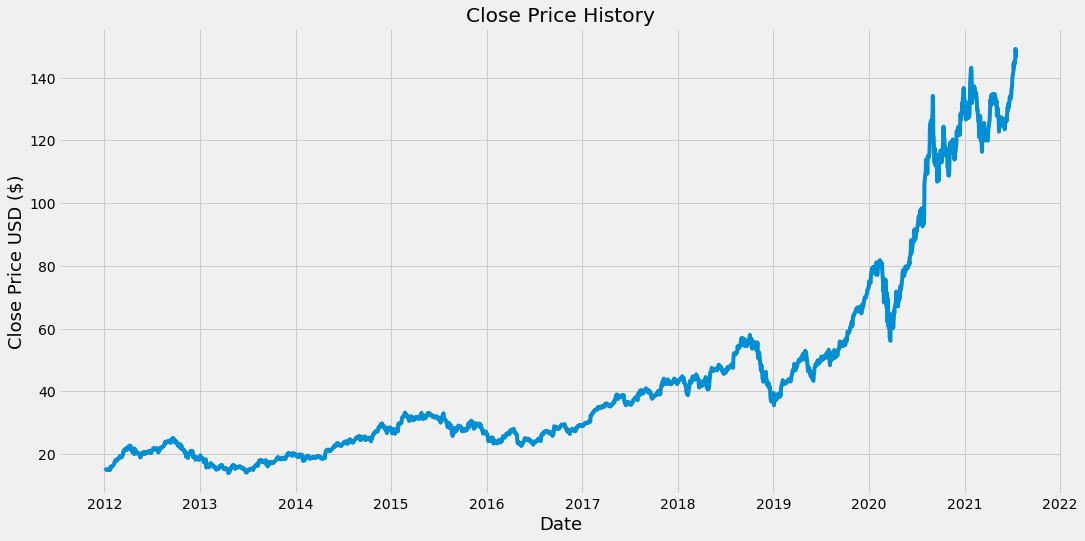

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
#Create a new dataframe with only the close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1920

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00546799],
       [0.00605176],
       [0.00726423],
       ...,
       [1.        ],
       [0.99504448],
       [0.97958622]])

In [ ]:
#Create the training data set
#Create the scaled training set
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

if i<= 60:
    print(x_train)
    print(y_train)
    print()